In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import os

import numpy as np

from matplotlib import pyplot
import matplotlib as mpl

from scipy import optimize

from scipy.io import loadmat

import utils

grader = utils.Grader()

%matplotlib inline

In [2]:
df = pd.read_csv('ratings_Electronics.csv')
df.head()

,userId,productId,ratings,timestamp,genre1,genre2,genre3
0,A2CX7LUOHB2NDG,321732944,5,1341100800,freezers,dishwashers,video game consoles
1,A2NWSAGRHCP8N5,439886341,1,1367193600,still cameras,freezers,home electronics
2,A2WNBOD3WNDNKT,439886341,3,1374451200,CD,computers,coffee grinders
3,A1GI0U4ZRJA8WN,439886341,1,1334707200,dough blenders,induction cookers,answering machines
4,A1QGNMC6O1VW39,511189877,5,1397433600,HiFi,induction cookers,electric kettles


In [3]:
df = df.drop('timestamp', axis=1)

In [4]:
df.shape

(1048575, 6)

In [5]:

df.dtypes

userId       object
productId    object
ratings       int64
genre1       object
genre2       object
genre3       object
dtype: object

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


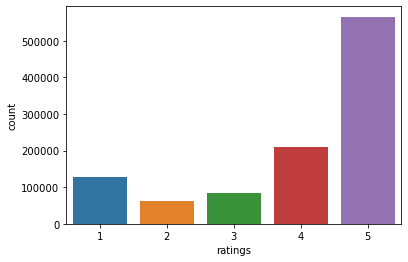

In [6]:
sns.countplot(df['ratings'])
plt.show()

In [8]:
dt = df.iloc[:50000, 0:]

In [9]:
dt.ratings.value_counts(normalize=True)

5    0.55322
4    0.20320
1    0.10936
3    0.07854
2    0.05568
Name: ratings, dtype: float64

C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


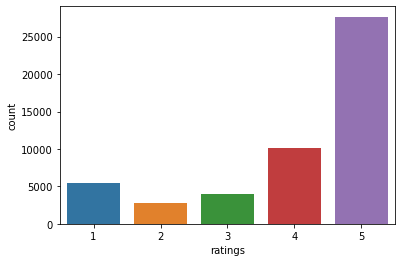

In [10]:
sns.countplot(dt['ratings'])
plt.show()

In [11]:
dt = dt.drop_duplicates(subset=['userId', 'productId'])

In [12]:
dt_sparse = dt.pivot(index='productId', columns='userId', values='ratings')
dt_sparse = dt_sparse.fillna(0)
dt_sparse.head()

userId,A001944026UMZ8T3K5QH1,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A014623426J5CM7M12MBW,A01580702BRW77PSJ9X34,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,...,AZZ1KF8RAO1BR,AZZ77XYX8O2WE,AZZA7IQWTXCH3,AZZGJ2KMWB7R,AZZGUU97OHUF1,AZZMV5VT9W7Y8,AZZP8BC9WE0N8,AZZST8OYL5P4Q,AZZUBI2MEAHI9,AZZZEWADNFNUM
productId,,,,,,,,,,,,,,,,,,,,,
059400232X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
089933623X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
094339676X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1034385789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1039869017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
sparse_matrix = dt_sparse.values.reshape(3445, 46554)
sparse_matrix.shape[0]

3445

In [14]:
R = []
for j in range(sparse_matrix.shape[1]):
    
    for ele in sparse_matrix:
        if ele[j]==0:
            R.append(0)
        else:
            R.append(1)
            
R = np.array(R)

In [15]:
R = R.reshape(3445,46554,  order='F')

In [16]:
R

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
Y=sparse_matrix

In [21]:
productId = dt_sparse.index
productId = list(productId)


In [22]:
def cofiCostFunc(params, Y, R, num_users, num_movies,
                      num_features, lambda_=0.0):

    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)

    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)


    
    J = (1/2)*np.sum((np.square(np.dot(X, Theta.T) - Y)*R)) + (lambda_/2)*np.sum(np.square(X)) + (lambda_/2)*np.sum(np.square(Theta))
    
    for i in range(R.shape[0]):
        
        idx = np.where(R[i, :] == 1)[0]
        Theta_temp = Theta[idx, :]
        Y_temp = Y[i, idx]
        X_grad[i, :] = np.dot(np.dot(X[i, :], Theta_temp.T) - Y_temp, Theta_temp) + lambda_ * X[i, :]
    
    for j in range(R.shape[1]):
        
        idx = np.where(R[:, j] == 1)[0]
        X_temp = X[idx, :]
        Y_temp = Y[idx, j]
        Theta_grad[j, :] = np.dot(np.dot(X_temp, Theta[j, :]) - Y_temp, X_temp) + lambda_ * Theta[j, :]
            
  
    
    grad = np.concatenate([X_grad.ravel(), Theta_grad.ravel()])
    return J, grad

In [39]:

n_m = len(productId)


my_ratings = np.zeros(n_m)

Y = np.hstack([my_ratings[:, None], Y])
R = np.hstack([(my_ratings > 0)[:, None], R])

Ynorm, Ymean = utils.normalizeRatings(Y, R)

num_movies, num_users = Y.shape
num_features = 5

X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.concatenate([X.ravel(), Theta.ravel()])


options = {'maxiter': 100}


lambda_ = 10
res = optimize.minimize(lambda x: cofiCostFunc(x, Ynorm, R, num_users,
                                               num_movies, num_features, lambda_),
                        initial_parameters,
                        method='TNC',
                        jac=True,
                        options=options)
theta = res.x

X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

print('Recommender system learning completed.')

Recommender system learning completed.


In [40]:
X.shape

(3445, 5)

In [41]:
X

array([[ 1.49856321e-03, -1.86369958e-03,  2.45281996e-03,
         9.58931401e-03, -1.37671326e-02],
       [ 1.12080532e-03,  3.55224552e-03,  4.62653773e-03,
        -2.34319144e-03,  5.75981989e-03],
       [-2.22124697e-03, -1.26392796e-03,  2.33173816e-03,
         2.34285541e-03,  1.58169781e-05],
       ...,
       [-3.01183494e-04, -8.54159770e-03,  1.60303526e-03,
         2.23604371e-03,  2.15922923e-03],
       [-2.60260327e-03,  4.26883155e-02,  1.76382874e-03,
         1.29523825e-02, -4.42877497e-03],
       [-1.02828442e-02,  4.11319036e-03,  3.80199057e-03,
         4.55198550e-03, -3.22616202e-03]])

In [42]:
theta.shape

(250005,)

In [43]:
p = np.dot(X, Theta.T)
my_predictions = p[:, 0] + Ymean

#movieList = utils.loadMovieList()
#hotel_list = list(hotel_title)

ix = np.argsort(my_predictions)[::-1]

print('Top recommendations for Cutomers:')
print('----------------------------')
for i in range(3445):
    j = ix[i]
    print('Predicting rating %.4f for Product %s' % (my_predictions[j], productId[j]))

print('\nOriginal ratings provided:')
print('--------------------------')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s' % (my_ratings[i], hotel_list[i]))

Top recommendations for Cutomers:
----------------------------
Predicting rating 5.0003 for Product 9984924769
Predicting rating 5.0003 for Product B00000J0E6
Predicting rating 5.0002 for Product B00004SCKG
Predicting rating 5.0002 for Product 9989499608
Predicting rating 5.0002 for Product B00003CW9D
Predicting rating 5.0002 for Product B00000J4CW
Predicting rating 5.0002 for Product 9985631722
Predicting rating 5.0002 for Product B00000J1GD
Predicting rating 5.0002 for Product B00001ZUHZ
Predicting rating 5.0002 for Product 6025005559
Predicting rating 5.0002 for Product B00000JI3W
Predicting rating 5.0002 for Product 9984976866
Predicting rating 5.0002 for Product 6162122646
Predicting rating 5.0002 for Product 059400232X
Predicting rating 5.0002 for Product 9966279008
Predicting rating 5.0002 for Product 9983805383
Predicting rating 5.0002 for Product 998572500X
Predicting rating 5.0002 for Product 9985603877
Predicting rating 5.0002 for Product 9875863270
Predicting rating 5.0002 

Predicting rating 3.9995 for Product B00001ZUHX
Predicting rating 3.9995 for Product B000023VUD
Predicting rating 3.9991 for Product B00000K0JM
Predicting rating 3.9990 for Product B00000J4GP
Predicting rating 3.9990 for Product B00004TH2Y
Predicting rating 3.9989 for Product B00000JBBG
Predicting rating 3.9989 for Product B000023VW5
Predicting rating 3.9968 for Product B00000IGBF
Predicting rating 3.9877 for Product B00001OPJZ
Predicting rating 3.9799 for Product B00000J1F3
Predicting rating 3.9792 for Product B00004S5H6
Predicting rating 3.9723 for Product B00001P4XH
Predicting rating 3.9718 for Product 9888002198
Predicting rating 3.9700 for Product B00000J4L8
Predicting rating 3.9681 for Product B00003CWG4
Predicting rating 3.9632 for Product B00000JD34
Predicting rating 3.9619 for Product B0000326O1
Predicting rating 3.9573 for Product B000023VW2
Predicting rating 3.9568 for Product 5135000011
Predicting rating 3.9544 for Product B00000JSGF
Predicting rating 3.9492 for Product B00

In [32]:
dt.ratings.value_counts()

5    27661
4    10160
1     5468
3     3927
2     2784
Name: ratings, dtype: int64